<a href="https://colab.research.google.com/github/DiploDatos/AprendizajeProfundo/blob/add_2024_content/8_Redes_transformers_Taller_de_Modelos_de_Lenguaje_a_tu_medida_(2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crédito total al Taller de Modelos de Lenguaje a tu medida del Workshop Argentino de NLP (2023), dictado por Hernán Maina, Guido Ivetta, Laura Alonso Alemany y Luciana Benotti. El notebook original [se encuentra aquí](https://github.com/nanom/llm_adaptation_2nlp_workshop/blob/main/notebook.ipynb), licenciado bajo [Licencia MIT](https://github.com/nanom/llm_adaptation_2nlp_workshop/blob/main/LICENSE).

# **IMPORTANTE**

* Todas las celdas indicadas con el símbolo ( ❗ ) son obligatorias y necesarias para el correcto funcionamiento del notebook.

* Aquellas señaladas con ( 🔎 ) son de profundización de contenido, optativas de leer y computar.

* Aquellas señaladas con ( 📖 ) son opcionales y expanden algún concepto en particular.

* Si una celda contiene el símbolo ( ⏳ ), significa que tomará más tiempo en computarse que el promedio. Tener en cuenta para aprovechar al máximo el tiempo disponible del taller.

# 0 - Inicialización de la notebook

In [ ]:
# @markdown ❗
# Instalación de librerías
!pip install -U transformers[torch] --quiet
!pip install -U tabulate --quiet
!pip install -U datasets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
# @markdown ❗
# Descarga de datasets
import os

ROOT_PATH = "llm_adaptation_2nlp_workshop"
DATASETS_PATH = os.path.join(ROOT_PATH, "datasets")

%rm -r "$ROOT_PATH"
!git clone https://github.com/nanom/llm_adaptation_2nlp_workshop.git "$ROOT_PATH"

rm: cannot remove 'llm_adaptation_2nlp_workshop': No such file or directory
Cloning into 'llm_adaptation_2nlp_workshop'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 94 (delta 42), reused 86 (delta 38), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 23.38 MiB | 17.27 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
# @markdown ❗
# Comprobación de recursos (GPUs)
!nvidia-smi

Thu Sep 26 02:14:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1 - Modelos de lenguaje

## 📖 Modelos de lenguaje y transformers

### ¿Qué son los "modelos de lenguaje"?

- Son modelos estadísticos predictivos, basados en aprendizaje automático sobre textos.
- Su función principal es **analizar** y/o **generar** texto de manera automática.
- Se entrenan encontrando patrones en grandes cantidades de texto libre.
- Dado un contexto (e.g. una secuencia de palabras), aplican los patrones inferidos para predecir la palabra siguiente, generando texto plausible y coherente.
- Si bien los modelos de lenguaje existen desde hace varias décadas en diferentes formas (modelos markovianos, conditional random fields, redes neuronales recurrentes), actualmente cuando alguien habla de un "Modelo de Lenguaje", usualmente se refiere a un modelo neuronal de tipo **Transformer**.

#### ¿Qué es un **Transformer**?

- Es un tipo de arquitectura de redes neuronales que se introdujo en el paper ["Attention is All You Need"](https://arxiv.org/abs/1706.03762).

- El tipo de aprendizaje que hacen estas redes está basado en **mecanismos de atención**, que ayudan al modelo a enfocarse en las partes más determinantes de la información, de forma que el entrenamiento sea más rápido y menos costoso que para otras arquitecturas, como las redes neuronales recurrentes.

<!-- La idea fundamental detras de un modelo Transformer, es procesar el lenguaje natural de una manera muy eficiente y efectiva, haciendolo ideal para ser aplicado a una gran cantidad de tareas de PLN.-->

- Existen diferentes variantes de transformer, de acuerdo a cómo y qué parte de sus componentes utilizan:
    - Los modelos de traducción secuencia a secuencia o `Seq2Seq` (e.g. [T5](https://arxiv.org/abs/1910.10683)), tienen un **codificador y decodificador** y son empleados para tareas de transformación como traducción, simplificación, cambio de estilo o resumen.
    - Los modelos que sólo usan el **codificador** (e.g. [BERT](https://arxiv.org/abs/1810.04805)) se usan para obtener representaciones vectoriales del texto (*embeddings*) que resultan muy útiles para  determinar relaciones de semejanza entre diferentes textos.
    - Los modelos basados en el **decodificador** (e.g. [GPT](https://arxiv.org/abs/2005.14165)) se usan para generar texto automáticamente, como respuestas a preguntas, ensayos o cuentos, entre otros.

<center><img src='https://heidloff.net/assets/img/2023/02/transformers.png' width=60%></center>

**Nota:** *Para una explicación más sencilla, pero más detallada, sugiero los posts de la serie "The Illustrated..." de [Jay Alammar](http://jalammar.github.io/):*
- [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
- [The Illustrated BERT](http://jalammar.github.io/illustrated-bert/)
- [The Illustrated GPT-2](http://jalammar.github.io/illustrated-gpt2/) / [How GPT-3 Works](http://jalammar.github.io/how-gpt3-works-visualizations-animations/)

## Probamos un BERT mediante la tarea *fill-mask*

En esta sección vamos a practicar con [BERT](https://en.wikipedia.org/wiki/BERT_(language_model)), un modelo de lenguaje con una arquitectura compuesta de **codificadores** (encoders).


Para familiarizarnos con BERT, vamos a jugar con la tarea "*Fill-Mask*", cuyo objetivo es completar una oración con algunas palabras, en los lugares marcados con `[MASK]`.

El modelo de lenguaje predecirá las palabras más adecuadas para encajar en esos espacios en blanco, es decir, las más probables dado el contexto, según los patrones estadísticos inferidos de los ejemplos de aprendizaje. Esto nos sirve para evaluar qué tan bien está modelando los textos.

In [ ]:
# @markdown 🔎
# Usamos pipeline como función auxiliar de alto nivel
from transformers import pipeline

fill_mask = pipeline(
    task="fill-mask",
    model="dccuchile/bert-base-spanish-wwm-uncased",
    top_k=5  #va a devolver 5 predicciones más probables
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/486k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
# @markdown 🔎
ejemplo = 'Córdoba es una [MASK] de Argentina.'
fill_mask(ejemplo)

[{'score': 0.3897227346897125,
  'token': 4933,
  'token_str': 'localidad',
  'sequence': 'córdoba es una localidad de argentina.'},
 {'score': 0.2656591236591339,
  'token': 1698,
  'token_str': 'ciudad',
  'sequence': 'córdoba es una ciudad de argentina.'},
 {'score': 0.09350410848855972,
  'token': 3827,
  'token_str': 'provincia',
  'sequence': 'córdoba es una provincia de argentina.'},
 {'score': 0.04004675894975662,
  'token': 3562,
  'token_str': 'especie',
  'sequence': 'córdoba es una especie de argentina.'},
 {'score': 0.023548586294054985,
  'token': 29075,
  'token_str': 'subespecie',
  'sequence': 'córdoba es una subespecie de argentina.'}]

## Probamos un GPT para la tarea de generación de texto

En esta sección vamos a practicar con [GPT](https://en.wikipedia.org/wiki/Generative_pre-trained_transformer), un modelo de lenguaje generativo con una arquitectura basada en transformers.

Vamos a jugar con la función de generación del modelo, que, dada una secuencia de palabras, predice la continuación más probable para la misma, según los patrones inferidos en los ejemplos de aprendizaje.

In [ ]:
# @markdown 🔎
# Usamos pipeline como función auxiliar de alto nivel
from transformers import pipeline

text_gen = pipeline(
    task="text-generation",
    model="gpt2",
    pad_token_id=50256,
    device='cuda',
)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# @markdown 🔎
ejemplo="My name is Lewis and I like to"
text_gen(ejemplo)

[{'generated_text': "My name is Lewis and I like to call myself the 'Big Guy' because he's the most famous guy in the business, and he's the first star to ever get a job doing it. Because all that was happening in the mid-90"}]

# 2 - Librerías para modelos de lenguaje


## Hugging Face 🤗

###  ¿Qué es Hugging Face 🤗?

- Una [comunidad colaborativa](https://huggingface.co/) especialmente enfocada en modelos de lenguaje y otros recursos de Inteligencia Artificial (IA).
- Ofrece repositorios para disponibilizar [modelos](https://huggingface.co/models), [datasets](https://huggingface.co/datasets) y [demos](https://huggingface.co/spaces).
- Además, ofrece varias librerías orientadas a la IA, particularmente al Aprendizaje Profundo (*Deep Learning*), entre las que destacan:
    - [`transformers`](https://huggingface.co/docs/transformers): La que veremos en esta charla, para todo lo relacionado a Procesamiento del Lenguaje Natural (PLN) con grandes modelos de lenguaje (*Large Language Models*, LLMs).
    - [`datasets`](https://huggingface.co/docs/datasets): Una librería con funcionalidades para el tratamiento de los conjuntos de datos a utilizar para entrenar o ajustar los LLMs.
    - [`tokenizers`](https://huggingface.co/docs/tokenizers): Una librería para el proceso de "tokenización", i.e. la división de texto de manera discreta en palabras o subpalabras.
- Hugging Face no sólo ofrece soluciones para PLN, sino también para imágenes, con librerías como [`diffusers`](https://huggingface.co/docs/diffusers), para la generación de imágenes:
    - Lectura recomendada: [The Illustrated Stable Diffusion](http://jalammar.github.io/illustrated-stable-diffusion/)

### ¿Cómo empezar con Hugging Face 🤗?

- Primero se [crea una cuenta en la página](https://huggingface.co/join).
- Luego podemos [crear modelos](https://huggingface.co/new) a través del menú que se despliega de nuestro avatar.
- Para poder subir el modelo personalizado que entrenaremos en esta notebook en tu cuenta de Hugging Face, necesitarás generar un token de acceso mediante los siguentes pasos:

> 1. **Accedé** a la [sección de tokens de acceso](https://huggingface.co/settings/tokens) de tu perfil:
    <center><img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/hub/User-Access-Token.png" width=70%></center>

> 2. Creá un **nuevo token** de acceso con permiso de escritura:
    <center><img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/hub/new-token.png" width=60%></center>
    
> 3. **Listo!**. Ya tenés tu token preparado para poder subir tu modelo a la plataforma de Hugging Face 🤗.

# 3 - ¿Cómo se entrenan los modelos de lenguaje?

En esta notebook **NO** vamos a entrenar completamente un LLM, porque los LLMs requieren de muchos datos y mucho cómputo para ser entrenados:
- Para **BERT**:
    - El costo total estimado de entrenamiento del modelo fue de U\$D 6912 (para su version *large*) y de U\$D 500 (para su versión *base*).
    - Mientras que la versión pequeña (*base*) cuenta con 109M de parámetros, su versión original (*large*) oscila en 334M, más del triple.
    - Su entrenamiento fue realizado sobre 3.3B de tokens (aproximadamente 20 GB de texto no comprimido).

- Para **GPT-3**:
    - Se estimó un costo de entrenamiento cercano a los U\$D 4.6 Millones.
    - Disponible en ocho tamaños, que van desde los 125M a los 175B parámetros.
    - Requirió de varias semanas de entrenamiento.
    - El corpus reportado en el cual fue entrenado es de aproximadamente 500B de palabras.
    - Se necesito de varias GPUs y hardware especializado para entrenarlo.

Sin embargo, vamos a **entrenar parcialmente** un modelo de lenguaje, en concreto, vamos a adaptarlo a un dominio particular.


## 📖 Pre-training, fine-tuning y domain adaptation


### Diferencia entre pre-training y fine-tuning

La distinción clave entre `pre-training` y `fine-tuning` se encuentra en las etapas del proceso de entrenamiento:

* El **pre-training**, es la primera fase de entrenamiento al que se somete todo modelo LLM, y requiere de una enorme cantidad de textos genéricos, como se ha descrito en el apartado anterior.

* Una vez finalizado este proceso inicial de entrenamiento, se obtiene un modelo genérico capaz de realizar predicciones genéricas sobre patrones textuales, pero sin especialización en ninguna tareas específicas.

* Si deseamos adaptar este modelo genérico para que desempeñe una tarea específica con un alto rendimiento (e.g.: *Text Clasification*, *Sentiment analysis*, *Question Answering*, *Information Extraction*, etc.), se lleva a cabo una segunda etapa de entrenamiento conocida como **fine-tuning**.

<center>
<!-- <img src="https://serokell.io/files/7i/7iyrq1z5.Inside_ChatGPT_pic1.png" width=80%>-->
<img src="https://miro.medium.com/v2/resize:fit:951/0*R31A71UjHM8R8Pps.png" width=80%>
</center>
<right> fuente: https://medium.com/mantisnlp/supervised-fine-tuning-customizing-llms-a2c1edbf22c3
</right>

Este entrenamiento específico requiere de menos ejemplos de entrenamiento y menos cálculo, ya que sólo modifica ligeramente el modelo ya entrenado. En este proceso, existen varías formas en como se "modifica" el modelo pre-entrenado durante esta fase: se pueden modificar las últimas capas, añadir capas a la red pre-entrenada, y otras variantes. En esta notebook vamos a trabajar con una aproximación sencilla, pero existen múltiples librerías en Hugging Face que implementan funcionalidades para llevar adelante diferentes tipos de *fine-tuning*, como por ejemplo la popular [LoRA](https://www.databricks.com/blog/efficient-fine-tuning-lora-guide-llms).

<!--<center>
<img src="https://media.licdn.com/dms/image/D5612AQEe2e_DJ51f2g/article-inline_image-shrink_1000_1488/0/1687324002269?e=1699488000&v=beta&t=vWDbM2RYNKa9tv5--w6Iub7YRRGkjld-s7U6VDd_7_Q" width=80%>

</center>
<right> fuente: https://www.linkedin.com/pulse/beginners-guide-fine-tuning-large-language-models-vaidheeswaran
</right>-->

### *Domain Adaptation*

Mientras que el *fine-tuning* se centra en ajustar un modelo de lenguaje *pre-entrenado* para realizar tareas específicas, la `adaptación de dominio` se enfoca en hacer que el modelo sea más efectivo en un dominio de datos particular.

En caso de que tus datos de entrenamiento pertenezcan a un determinado tema específico (e.g.: leyes, medicina, informática, etc.) o un estilo específico (e.g.: académico, infantil, publicitario, etc.), y difieran substancialmente del corpus estándar en el cual fue entrenado inicialmente el LLM, podemos pensar diferentes opciones para incorparar este nuevo conocimiento:


1. **Entrenamiento desde cero:** Este enfoque implica entrenar desde cero (*from scratch*) un nuevo modelo de lenguaje con textos del dominio de interés. Sin embargo, no es recomendable para el público en general, dada la gran cantidad de recursos computacionales, horas de procesamiento y textos de entrenamiento necesarios para lograr un rendimiento comparable a los modelos estado del arte (modelos *state-of-the-art, SOTA*).
2.  **Uso de modelos disponibles:** Se aprovechan modelos disponibles públicamente, específicos para el dominio de interés (e.g: [LegalBERT](https://arxiv.org/abs/2010.02559), [FinBERT](https://arxiv.org/abs/1908.10063) y [BioBERT](https://arxiv.org/abs/1901.08746); todos disponibles en Hugging Face 🤗 de manera gratuita.)
3. **Adaptación de modelos pre-entrenados**: Esta aproximación, tambien conocida en la literatura como *'further pre-training'*, *'inter-training'*, *'continued pre-training'* o *'domain-adaptation'*, implica tomar un modelo de lenguaje pre-entrenado y, aprovechando todo el conocimiento y las representaciones ya aprendidas, **continuar su entrenamiento sobre el conjunto de datos especializados o personalizados**. Esta técnica permite alcanzar muy buenos resultados, utilizando menos recursos computacionales, horas y datos de entrenamiento.

<center>
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*4eNaH6y0dSsaxtTQW0tgHQ.png" width=80%>
</center>
<right> fuente: https://medium.com/@shankar.arunp/training-bert-from-scratch-on-your-custom-domain-data-a-step-by-step-guide-with-amazon-25fcbee4316a
</right>

Tanto para el entrenamiento inicial (*pre-training*) como para la adaptación de dominio mediante un entrenamiento intermedio (*inter-training*), el modelo debe ser re-entrenado utilizando dos tareas auto-supervisadas específicas: **Masked Language Modeling (MLM)**, o una combinación entre **(MLM)** y **Next Sentence Prediction (NSP)**.

# 4 - Vamos a personalizar un modelo!

## 4.1 - ¿Cómo personalizar un modelo BERT?


### 📖 BERT


#### Masked Language Modeling (MLM)
> Consiste en enmascarar (ocultar) palabras aleatorias en cada oración o frase de entrada, y entrenar el modelo para que aprenda a predecirlas basándose en el contexto circundante (palabras vecinas). Durante el entrenamiento, alrededor del **15%** de las palabras se seleccionan al azar y se enmascaran, reemplazándolas con el token especial **[MASK]** (ver la sección Enmascarado Aleatorio). De esta forma, el modelo infiere patrones de relaciones entre palabras.
<center>
<img src="http://jalammar.github.io/images/BERT-language-modeling-masked-lm.png" width=65%>
</center>


#### Next Sentence Prediction (NSP)
> Aunque no es obligatoria, `NSP` es otro componente importante en el entrenamiento de BERT. A partir de un texto considerado como una secuencia de oraciones, se generan ejemplos de entrenamiento consistentes en pares de oraciones aleatorios. El modelo tiene que aprender a identificar si una oración sigue a otra en el texto original. De esta forma, el modelo infiere patrones de relaciones entre oraciones.

<center>
<img src="http://jalammar.github.io/images/bert-next-sentence-prediction.png" width=65%>
</center>

En esta notebook **realizaremos el ajuste de dominio mediante la tarea de MLM** utilizando la clase [**BertForMaskedLM**](https://huggingface.co/docs/transformers/v4.32.1/en/model_doc/bert#transformers.BertForMaskedLM) (modelo BERT con un bloque superior extra que posibilita el `modelado del lenguaje enmascarado`), ofrecida por la biblioteca [**transformer**](https://github.com/huggingface/transformers) de Hugging Face 🤗.

* Se utilizarán diferentes datasets especializados (tanto en español como en inglés).
* Utilizaremos como modelo pre-entrenado  [bert-base-uncased](https://huggingface.co/bert-base-uncased) para realizar la adaptación en los datasets en inglés, y [dccuchile/bert-base-spanish-wwm-uncased](https://huggingface.co/dccuchile/bert-base-spanish-wwm-uncased) para los correspondientes en español.

### Carga de datasets

* Utilizaremos la librería `datasets` de Hugging Face para cargar cada uno de los corpus seleccionados.
* Para la personalización de BERT, tenemos un total de 4 conjuntos de datos, 3 de ellos en español y 1 en Inglés:
    * Peppa Pig (es):
      * ≈ 3k muestras.
      * Extraído de subtítulos de 77 episodios.
    * Martin Fierro (es):
      * ≈ 2k muestras/versos.
      * Extraído del libro completo de José Hernández
    * Preguntas de no videntes (en):
      * ≈ 33k muestras/preguntas.
      * Generado a partir de preguntas visuales realizadas sobre imágenes tomadas por personas con discapacidades visuales durante la ejecución de sus tareas cotidianas. *(click [aqui](https://vizwiz.org/tasks-and-datasets/vqa/) para mas información sobre este dataset)*
    * Reseñas de Vinos (es):
      * ≈ 130k muestras.
      * Extraído de descripciones de vinos de todo el mundo.
* A continuación, seleccionen de la lista desplegable el dataset que mas nos interese.
* En `max_samples`, elijan un límite máximo de datos para acotar el cómputo necesario.
* Automáticamente el siguiente código dividirá el dataset elegido en dos partes:
    * El 80% como conjunto de entrenamiento.
    * El 20% como conjunto de test.


In [ ]:
# @markdown ❗
# @title  { run: "auto" }
import os
import torch
from datasets import load_dataset, Dataset

# Fijación de semilla para reproducibilidad de resultados
torch.manual_seed(42)

# Recolección de parámetros de formulario
DATASET_NAME = "Peppa Pig (es)" # @param ["Resenas de Vinos (es)", "Preguntas de no videntes (en)", "Martin Fierro (es)", "Peppa Pig (es)"]
max_samples = 30000 # @param {type:"number"}
name_to_file = {
    'Preguntas de no videntes (en)' : "vizwiz.csv",
    'Resenas de Vinos (es)'         : "wines_es.csv",
    'Martin Fierro (es)'            : "martin_fierro.csv",
    'Peppa Pig (es)'                : "peppa_pig.csv",
}

# Carga de conjunto de datos
bert_ds = load_dataset(
    path=DATASETS_PATH,
    data_files={'all_data': name_to_file[DATASET_NAME]},
)

# División de conjunto de datos en subconjuntos de entrenamiento y testeto
total_size = min(max_samples, len(bert_ds['all_data']))
val_size = int(total_size *.2)
train_size = total_size - val_size

bert_ds = bert_ds["all_data"].train_test_split(
    train_size=train_size,
    test_size=val_size,
    seed=42
)

print(f"* Información de dataset '{DATASET_NAME}':\n---")
bert_ds

Generating all_data split: 0 examples [00:00, ? examples/s]

* Información de dataset 'Peppa Pig (es)':
---


DatasetDict({
    train: Dataset({
        features: ['samples'],
        num_rows: 2235
    })
    test: Dataset({
        features: ['samples'],
        num_rows: 558
    })
})

### Tokenización de datos


- La tokenización es un paso de pre-procesamiento esencial cuando se utiliza BERT u otro LLM.
- BERT procesa el texto en forma de tokens, que son elementos individuales del texto de entrada, como palabras, signos de puntuación o tokens especiales como `[CLS]`, `[SEP]`, `[PAD]`, `[UNK]` y `[MASK]`.
- A continuación iniciaremos y analizaremos tal proceso.

Recuerde utilizar el modelo `bert-base-uncased` como modelo base para los datasets en idioma inglés, y `dccuchile/bert-base-spanish-wwm-uncased` para los datasets en español.

In [ ]:
# @markdown ❗
# Iniciación de tokenizador
from transformers import BertTokenizer

MODEL_CHECKPOINT = "dccuchile/bert-base-spanish-wwm-uncased" # @param ["bert-base-uncased","dccuchile/bert-base-spanish-wwm-uncased"]
tokenizer = BertTokenizer.from_pretrained(MODEL_CHECKPOINT, TOKENIZERS_PARALLELISM=False)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# @markdown 🔎
# Tokenización de ejemplo de prueba
samples = bert_ds['train']['samples'][:5]

for ith, sample in enumerate(samples):
    token_ids = tokenizer(sample)['input_ids']
    token_str = [tokenizer.decode([tk_id]) for tk_id in token_ids]
    print(f"{sample}")
    print(f"{token_str}\n")

Peppa, ¿seguro que no quieres quitarte los zapatos?
['[CLS]', 'pep', '##pa', ',', '¿', 'seguro', 'que', 'no', 'quieres', 'quitarte', 'los', 'zapatos', '?', '[SEP]']

por muy rápido que corráis.
['[CLS]', 'por', 'muy', 'rápido', 'que', 'corr', '##áis', '.', '[SEP]']

Hola mis chiquitines.
['[CLS]', 'hola', 'mis', 'chi', '##qui', '##tines', '.', '[SEP]']

¡No tiene gracia!
['[CLS]', '¡', 'no', 'tiene', 'gracia', '!', '[SEP]']

No te preocupes Peppa, soy un experto en montar tiendas.
['[CLS]', 'no', 'te', 'preocupes', 'pep', '##pa', ',', 'soy', 'un', 'experto', 'en', 'montar', 'tiendas', '.', '[SEP]']



In [ ]:
# @markdown 🔎
# Visualización de 'tokes especiales' utilizados por tokenizador
for name, tk in tokenizer.special_tokens_map.items():
    print(f"{name}. Token: {tk}; Token_id: {tokenizer.vocab[tk]}")

unk_token. Token: [UNK]; Token_id: 3
sep_token. Token: [SEP]; Token_id: 5
pad_token. Token: [PAD]; Token_id: 1
cls_token. Token: [CLS]; Token_id: 4
mask_token. Token: [MASK]; Token_id: 0


* Dado que entrenaremos un modelo de BERT con un conjunto de datos que tienen una longitud variable, es fundamental aplicar el proceso de tokenización y el relleno (padding) adecuados a nuestros datos. Esto permite que todas las secuencias tengan la misma longitud fija, garantizando un procesamiento uniforme y eficiente de los datos durante el entrenamiento y la inferencia.
* A continuación realizaremos un histograma de la cantidad de tokens de cada ejemplo, y utilizaremos esa información para realizar posteriormente la tokenización del dataset completo.

Map:   0%|          | 0/2235 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

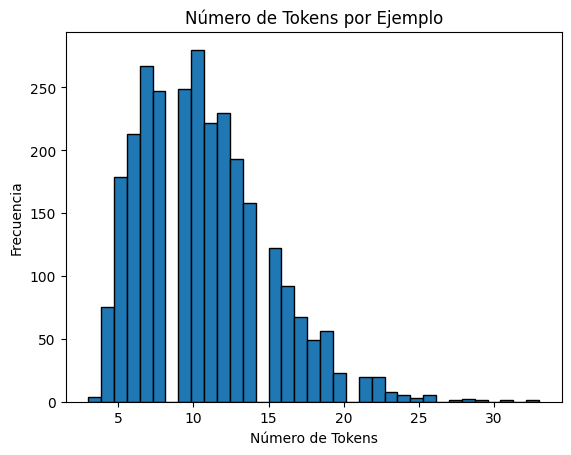

Total de ejemplos: 2793
Percentil 25: 7.0
Percentil 50 (Mediana): 10.0
Percentile 75: 13.0
Max: 33


In [ ]:
# @markdown ❗
# Generación de histograma de número de tokens por ejemplos
import matplotlib.pyplot as plt
import numpy as np

# Cálculo de número de tokens por ejemplos
def count_tokens_fn(batch):
    tokenized_batch = tokenizer(batch['samples'])
    tokenized_batch['count'] = [len(tks) for tks in tokenized_batch['input_ids']]
    return tokenized_batch

result = bert_ds.map(
    function=count_tokens_fn,
    batched=True
)

num_of_tokens_list = result['train']['count'] + result['test']['count']

# Generación de histograma
plt.hist(num_of_tokens_list, bins=35, edgecolor='k')
plt.xlabel('Número de Tokens')
plt.ylabel('Frecuencia')
plt.title('Número de Tokens por Ejemplo')
plt.show()

# Cálculo de percentiles (e.g., 25th, 50th, and 75th percentiles)
percentiles = np.percentile(num_of_tokens_list, [25, 50, 75])

print(f"Total de ejemplos: {len(num_of_tokens_list)}")
print(f"Percentil 25: {percentiles[0]}")
print(f"Percentil 50 (Mediana): {percentiles[1]}")
print(f"Percentile 75: {percentiles[2]}")
print(f"Max: {np.max(num_of_tokens_list)}")

- A continuación, la función auxiliar `tokenize_data_fn` servirá para tokenizar y codificar el conjunto completo de datos de manera eficiente mediante el [método `map`](https://huggingface.co/docs/datasets/about_map_batch).
- Lo que devolverá será un nuevo dataset cuyos tokens estarán ''convertidos'' en:
    - índices del vocabulario (*input_ids*),
    - máscaras de atención [(*attention_mask*)](https://huggingface.co/docs/transformers/glossary#attention-mask),
    - tipos de tokens [(*token_type_ids*)](https://huggingface.co/docs/transformers/glossary#token-type-ids),
    - y etiquetas (*labels*) que serán utilizadas como `Ground Truth` en la etapa de entrenamiento.
- `MAX_TOKEN_LENGTH`: Indica el máximo número de tokens que el modelo utilizará para codificar cada ejemplo/muestra. Debemos aumentarlo cuando los ejemplos de nuestro conjunto de datos son más largos, pero cuanto más largos son, más espacio ocupan en la memoria. Una estrategia común para determinar el tamaño máximo de tokens es realizar un histograma y quedarnos con el valor del percentil 75% del largo de los ejemplos. También podemos utilizar el número de tokens de la secuencia más larga si disponemos de suficiente capacidad de memoria.

In [ ]:
# @markdown ❗
# Tokenización de conjunto de datos completo

# Número máximo de tokens a utilizar
MAX_TOKEN_LENGTH = 32 # @param {type:"slider", min:8, max:128, step:8}

def tokenize_data_fn(batch):
    tokenized_sample = tokenizer(
        batch['samples'],
        max_length=MAX_TOKEN_LENGTH,
        truncation=True,
        padding='max_length',
        return_tensors='pt',
    )

    tokenized_sample["labels"] = tokenized_sample['input_ids'].clone()
    return tokenized_sample

tokenized_bert_ds = bert_ds.map(
    function=tokenize_data_fn,
    batched=True,
    remove_columns=["samples"]
)

print(tokenized_bert_ds)

Map:   0%|          | 0/2235 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 2235
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 558
    })
})


In [ ]:
# @markdown 🔎
# Visualización de proceso de tokenización para el primer ejemplo del conjunto de datos
sample = tokenized_bert_ds["train"][0]

print(f"- input_ids:        {sample['input_ids']}")
print(f"- attention_mask:   {sample['attention_mask']}")
print(f"- token_type_ids:   {sample['token_type_ids']}")
print(f"- labels:           {sample['labels']}")

- input_ids:        [4, 20842, 1280, 1019, 1063, 2165, 1041, 1054, 1803, 25428, 1067, 7566, 1059, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
- attention_mask:   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- token_type_ids:   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- labels:           [4, 20842, 1280, 1019, 1063, 2165, 1041, 1054, 1803, 25428, 1067, 7566, 1059, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Enmascarado Aleatorio

> Este proceso es el encargado de ocultar aleatoriamente el 15\% de los tokens y formatear los datos de entrenamiento de manera adecuada, asegurando que las secuencias de entrada tengan la longitud correcta y que las máscaras de atención se apliquen correctamente.

* Para implementar este proceso de manera sencilla, utilizaremos el método [DataCollatorForLanguageModeling](https://huggingface.co/docs/transformers/v4.32.1/en/main_classes/data_collator#transformers.DataCollatorForLanguageModeling) proporcionado por la biblioteca de Hugging Face.

* Como se podrá observar en el siguente ejemplo, es común utilizar un valor especial como **-100** en la salida de las etiquetas (*labels*) para indicar la posición de los tokens que se **IGNORAN** en el cálculo de la función de pérdida llevada a cabo durante el entrenamiento.

In [ ]:
# @markdown ❗
import torch, random
from transformers import DataCollatorForLanguageModeling

data_collate_fn = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm_probability=0.15
)

In [ ]:
# @markdown 🔎
# Visualizacion de proceso de 'enmascarado aleatorio' de tokens
seed = random.randint(0,100)
samples = [tokenized_bert_ds['train'][i] for i in range(3)]

print("DataCollator Outputs")
torch.manual_seed(seed)
print("--- Tokens:")
for sample in data_collate_fn(samples)['input_ids']:
    print(f">> {[tokenizer.decode([tk]) for tk in sample]}'")

torch.manual_seed(seed)
print("\n--- 'input_ids':")
for sample in data_collate_fn(samples)['input_ids']:
    print(f">> {sample.tolist()}'")

torch.manual_seed(seed)
print("\n--- 'labels':")
for sample in data_collate_fn(samples)['labels']:
    print(f">> {sample.tolist()}")

DataCollator Outputs
--- Tokens:
>> ['[CLS]', 'pep', '##pa', ',', '¿', 'seguro', 'que', 'no', 'quieres', 'quitarte', '[MASK]', 'zapatos', '?', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']'
>> ['[CLS]', 'por', 'muy', 'rápido', '[MASK]', 'corr', '##áis', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']'
>> ['[CLS]', '[MASK]', 'mis', 'chi', '##qui', '##tines', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']'

--- 'input_ids':
>> [4, 20842, 1280, 1019, 1063, 2165, 1041, 1054, 1803, 25428, 0, 7566, 1059, 5, 1, 1, 1, 1, 

### Probando el Modelo Base

- Antes de **personalizar** (adaptar) el modelo a nuestro conjunto de datos seleccionado, veremos cómo se desenvuelve en la tarea de *fill-mask*.

- Para ello, escriba una frase muy característica del dominio al que se quiere adaptar, y enmascare alguna de sus palabras utilizando el token `[MASK]`.


In [ ]:
# @markdown 🔎
# Ejemplo para español, pensando en adaptar el modelo a Peppa Pig
# Usamos pipeline como función auxiliar de alto nivel
from transformers import pipeline

fill_mask = pipeline(
    task="fill-mask",
    model="dccuchile/bert-base-spanish-wwm-uncased",
    top_k=5
)

ejemplo = 'A Peppa le encanta saltar en los [MASK] de barro' # @param {type:"string"}
fill_mask(ejemplo)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': 0.22510391473770142,
  'token': 12837,
  'token_str': 'lagos',
  'sequence': 'a peppa le encanta saltar en los lagos de barro'},
 {'score': 0.11403446644544601,
  'token': 4473,
  'token_str': 'juegos',
  'sequence': 'a peppa le encanta saltar en los juegos de barro'},
 {'score': 0.10608471930027008,
  'token': 16441,
  'token_str': 'puentes',
  'sequence': 'a peppa le encanta saltar en los puentes de barro'},
 {'score': 0.0892326682806015,
  'token': 24094,
  'token_str': 'castillos',
  'sequence': 'a peppa le encanta saltar en los castillos de barro'},
 {'score': 0.041719574481248856,
  'token': 13452,
  'token_str': 'muros',
  'sequence': 'a peppa le encanta saltar en los muros de barro'}]

In [ ]:
# @markdown 🔎
# Ejemplo para inglés, pensando en adaptar el modelo a VizWiz
# Usamos pipeline como función auxiliar de alto nivel
from transformers import pipeline

fill_mask = pipeline(
    task="fill-mask",
    model="bert-base-uncased",
    top_k=5
)

ejemplo = "Can you [MASK] me the model on the back of the iPhone?" # @param {type:"string"}
fill_mask(ejemplo)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': 0.7363616228103638,
  'token': 2265,
  'token_str': 'show',
  'sequence': 'can you show me the model on the back of the iphone?'},
 {'score': 0.10993441939353943,
  'token': 2425,
  'token_str': 'tell',
  'sequence': 'can you tell me the model on the back of the iphone?'},
 {'score': 0.07615769654512405,
  'token': 2507,
  'token_str': 'give',
  'sequence': 'can you give me the model on the back of the iphone?'},
 {'score': 0.010203925892710686,
  'token': 2131,
  'token_str': 'get',
  'sequence': 'can you get me the model on the back of the iphone?'},
 {'score': 0.009682041592895985,
  'token': 4604,
  'token_str': 'send',
  'sequence': 'can you send me the model on the back of the iphone?'}]

### Entrenamiento para adaptación

- Una vez definido el conjunto de datos y completado el proceso de tokenización, pasemos a la parte más intensa computacionalmente, el entrenamiento.
- A continuación, definimos las configuraciones del entrenamiento mediante [`TrainingArguments`](https://huggingface.co/docs/transformers/v4.28.1/en/main_classes/trainer#transformers.TrainingArguments).
- ... y definimos el entrenamiento del modelo mediante la clase  [`Trainer`](https://huggingface.co/docs/transformers/v4.28.1/en/main_classes/trainer#transformers.Trainer).


1.   ***epochs***: Número de épocas de entrenamiento. En cada epoch, el algoritmo de entrenamiento recibe cada uno de los ejemplos del dataset de entrenamiento.
2.  ***batch_size***: Cantidad de datos procesados por iteración antes de actualizar el modelo (aumentar este número mejora las estimaciones de cada iteración ya que será una muestra más representativa del dataset en general, pero requerirá más memoria y será necesario monitorizar y re-ajustar el `learning_rate`)
3.  ***learning_rate***:  Tamaño del ''ajuste'' realizado en el modelo en cada iteración, mientras se avanza hacia un mínimo de la función de pérdida.

**Nota**: El valor de estos parámetros, en conjunción al poder de cómputo disponible, determinará el tiempo y la cantidad de cálculo requerido para poder realizar el entrenamiento del modelo. Puede ir desde unos segundos hasta varios minutos.

In [ ]:
# @markdown ❗
from transformers import TrainingArguments, Trainer, BertForMaskedLM

# Eliminación de checkpoints anteriores
!rm -r "$CUSTOM_MODEL_CHECKPOINT"

# Configuración de hiperparámetros
MODEL_CHECKPOINT = "dccuchile/bert-base-spanish-wwm-uncased" # @param ["dccuchile/bert-base-spanish-wwm-uncased", "bert-base-uncased"]
BATCH_SIZE = 64 # @param {type:"slider", min:8, max:64, step:8}
LEARNING_RATE = 2e-5 # @param {type:"number"}
EPOCHS = 5 # @param {type:"slider", min:3, max:15, step:1}
LOGGING_STEPS = len(tokenized_bert_ds["train"]) // BATCH_SIZE
CUSTOM_MODEL_CHECKPOINT = "bert_adaptation_" + DATASET_NAME.replace(" ", "_")[:-5].lower()

# Configuración de entrenamiento
training_args = TrainingArguments(
    output_dir=CUSTOM_MODEL_CHECKPOINT,
    overwrite_output_dir=True,
    evaluation_strategy="epoch",
    num_train_epochs=EPOCHS,
    optim='adamw_torch',
    learning_rate=LEARNING_RATE,
    weight_decay=0.01,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    push_to_hub=False,
    fp16=True,
    logging_steps=LOGGING_STEPS,
    report_to="none",
    save_strategy="no"
)

# Instanciación de modelo
model = BertForMaskedLM.from_pretrained(MODEL_CHECKPOINT)

# Instanciación de clase Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_bert_ds["train"],
    eval_dataset=tokenized_bert_ds["test"],
    data_collator=data_collate_fn,
    tokenizer=tokenizer,
)

trainer.args._n_gpu = 1

rm: cannot remove '': No such file or directory


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


* Antes de comenzar el entrenamiento, calcularemos la [**Perplexity**](https://huggingface.co/docs/transformers/perplexity) del modelo de lenguaje.



📖 Perplexity

> La `Perplexity` es una métrica que nos permite evaluar cuánta incertidumbre tiene un modelo cuando tiene que predecir palabras en un conjunto de prueba determinado. La misma, ayuda a medir qué tan bien conoce el modelo el lenguaje, y cuán coherentes serán sus predicciones. En general, una *perplejidad* más baja indicará que el modelo genera textos que claramente pertenecen al lenguaje.
<center>
<img src="https://thegradient.pub/content/images/size/w1600/2020/04/xkcd_entropy-2.png" width=50%>
</center>
fuente: https://thegradient.pub/understanding-evaluation-metrics-for-language-models/

Si queremos evaluar qué tanto se adapta un modelo a un dominio determinado, podemos estimar su perplejidad para las tareas de completar palabras (MLM) o generación de texto en oraciones del dominio de interés, ya sea sobre conjunto de oraciones que nos interesen particularmente (un *benchmark* o *testbed*) o sobre un  corpus representativo del dominio en general.

> Los animamos a crear un mini-testbed, una listita de oraciones que les permita ver rápidamente qué pasa con diferentes tipos de adaptaciones. Les va a servir mucho para monitorear de forma sistemática los cambios en su sistema! Luego pueden compartir sus testbeds con la comunidad, un buen testbed vale oro :-).

In [ ]:
# @markdown  🔎
import math

# Fijamos semilla para reproducibilidad de resultados
torch.manual_seed(42)

# Estimación de perplexity previa a entrenamieto
eval_results = trainer.evaluate()
print(f">>> Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

>>> Perplexity: 137.82


In [ ]:
# @markdown ❗⏳
# Inicio de entrenamiento
trainer.train()

# Guardado de entrenamiento
trainer.save_model(CUSTOM_MODEL_CHECKPOINT)

Epoch,Training Loss,Validation Loss,Model Preparation Time
1,3.849100,3.526670,0.003400
2,2.917100,2.854309,0.003400
3,2.507100,2.919164,0.003400
4,2.351600,2.447578,0.003400
5,2.369600,2.744696,0.003400



* Ahora, estimemos nuevamente la `perplexity` del modelo y comparemos con el valor obtenido previamente.

In [ ]:
# @markdown 🔎
# Fijamos semilla para reproducibilidad de resultados
torch.manual_seed(42)

# Estimación de perplexity posterior a entrenamiento
eval_results = trainer.evaluate()
print(f">>> Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

>>> Perplexity: 8.95



### Probando el Modelo Adaptado

- Ahora que tenemos el modelo entrenado con el dataset específico, la pregunta es, ¿Cómo se comportará?
- Para ello volvemos a hacer la prueba anterior utilizando la tarea de *fill-mask*, quizás esta vez con resultados más ajustados al dominio. Acá es donde se luce un buen testbed!
- Para que los resultados sean mas fáciles de comparar, la función `compare_models()` será la encargada de procesar y retornar, para cada oración de ejemplo ingresada, un ranking comparativo de las predicciones realizadas entre el nuevo modelo adaptado y el modelo base original.

In [ ]:
# @markdown ❗
import os
import transformers
from typing import List
from tabulate import tabulate
from transformers import pipeline

# Función auxiliar para comparación de predicciones de modelos
def compare_models(
    custom_model: transformers.pipelines.fill_mask.FillMaskPipeline,
    base_model: transformers.pipelines.fill_mask.FillMaskPipeline,
    sentences: List[str],
    top_k=5
) -> None:

    headers = ['Sent','Custom Bert', '(%)', 'Base Bert', '(%)']
    rows = []
    for sent in sentences:
        rows.append([sent, '', '', '', ''])

        c_out = custom_model(sent)
        o_out = base_model(sent)

        c_tokens = [(i['token_str'], str(round(i['score']*100,1))+"%") for i in c_out]
        o_tokens = [(i['token_str'], str(round(i['score']*100,1))+"%") for i in o_out]

        for (p1,s1), (p2,s2) in zip(c_tokens, o_tokens):
            rows.append(['', p1, s1, p2, s2])

    table = tabulate(rows, headers=headers, tablefmt="text", numalign="center")
    print(table, "\n")

# Instanciación de modelo personalizado y modelo base
base_model = pipeline(task="fill-mask", model=MODEL_CHECKPOINT, device='cuda')
custom_model = pipeline(task="fill-mask", model=CUSTOM_MODEL_CHECKPOINT, device='cuda')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# @markdown ❗

# Conjunto de ejemplos de prueba
vizwiz_test_examples = [
    "can you tell me the title of the book? [MASK].",
    "please [MASK] this shirt",
    "what [MASK] is this?",
    "[MASK] can you tell me what is this?",
    "how clear is this [MASK]?",
    "is the floor [MASK]?",
    "the microwave is [MASK]?."
]

vinos_test_examples = [
    "Este [MASK] argentino de altura es una verdadera",
    "Con un color profundo e [MASK]",
    "Los sabores de [MASK] persisten",
    "Hecho 100% de [MASK]",
    "El sabor fue [MASK]",
    "Con su [MASK] mezcla de minerales",
    "Por primera vez en [MASK],",
    "Brazamora de [MASK] bonito"
]

martin_fierro_test_examples = [
    "En los campos de la [MASK] extensa",
    "donde el viento y el sol se [MASK]",
    "cabalgo firme con mi [MASK]",
    "bajo el cielo de [MASK] risueño",

    "Con mi [MASK] y mi lazo",
    "enfrento a la [MASK] con valor",
    "batiéndome siempre a mi [MASK]",
    "en este ancho y rudo [MASK]",

    "Así cabalgo con alma [MASK]",
    "como otros en su [MASK]",
    "defendiendo mi [MASK] y mi gente",
    "en esta tierra que [MASK] sin cesar",

    "Con [MASK] al cinto, firme y diestro",
    "Enfrento [MASK], firme como el resto",
    "Mate en mano, bajo el cielo [MASK]",
    "Mi coraje y mi [MASK], jamás han claudicado."
]

peppa_pig_test_examples = [
    "[MASK], puedes decir dinosarurio?",
    "¡Hola, soy Peppa [MASK]!",
    "George tiene un [MASK] muy querido.",
    "El sol brilla en el [MASK] del jardín.",
    "Peppa y George juegan en el [MASK].",
    "Mamá Pig prepara [MASK] deliciosos.",
    "Vamos al [MASK] para montar en bicicleta.",
    "El [MASK] está lleno de flores hermosas.",
    "Peppa y sus amigos tienen [MASK] en el parque."
]

# Moficar 'sentences' acorde al conjunto de datos utilizado para la personalización
compare_models(
    custom_model=custom_model,
    base_model=base_model,
    sentences=peppa_pig_test_examples
)

Sent                                            Custom Bert    (%)    Base Bert    (%)
----------------------------------------------  -------------  -----  -----------  -----
[MASK], puedes decir dinosarurio?
                                                george         30.7%  uh           10.4%
                                                papi           8.7%   si           7.6%
                                                mami           8.4%   oh           6.3%
                                                ¿              4.4%   espera       6.3%
                                                oh             4.2%   um           5.9%
¡Hola, soy Peppa [MASK]!
                                                pig            77.0%  [UNK]        5.1%
                                                george         1.3%   pep          3.6%
                                                mamá           1.3%   !            3.1%
                                                /           

### Subiendo tu modelo a Hugging Face  🤗

Querés que tu familia, amigos y futuros empleadores puedan probar tu chatbot? En Huggingface 🤗 podés desplegar una demo muy fácilmente:

> Recorda generar tu **token de acceso** siguendo las instrucciones de la [Sección 2](#Librerías-para-modelos-de-lenguaje). Será necesario para que puedas autentificarte en la plataforma y subir tu modelo.

In [ ]:
# @markdown ❗
# Logeo a plataforma mediante token de acceso
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# @markdown ❗
# Esto envía el modelo entrenado al repositorio de modelos de Hugging Face.
trainer.push_to_hub()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jbarsce/bert_adaptation_peppa_pig/commit/ce4ce3f3283d1400da3e099e321fe9a229e007bd', commit_message='End of training', commit_description='', oid='ce4ce3f3283d1400da3e099e321fe9a229e007bd', pr_url=None, pr_revision=None, pr_num=None)

## 4.2 - ¿Cómo personalizar un modelo GPT?


- Se inicia por algún modelo pre-entrenado para la tarea específica que uno busca (e.g. clasificación, generación, etc).
- Se toma un corpus especializado (anotado, revisado, etc.) y se entrena utilizando dicho corpus.
- Intentaremos [entrenar que un modelo genere texto](https://github.com/huggingface/notebooks/blob/main/examples/language_modeling.ipynb) con el estilo de alguno de los conjuntos de datos disponibles para este taller.
- Utilizaremos el modelo `DeepESP/gpt2-spanish` como base para español y el modelo `gpt2` como base para inglés.
* A diferencia de la adaptación de dominio realizada en el modelo BERT, los modelos de generación de texto se entrenan utilizando una tarea auto-supervisada denominada [*Causal Language Modeling*](https://huggingface.co/docs/transformers/tasks/language_modeling).


### Carga de Datasets

* Utilizaremos la librería `datasets` de HuggingFace para cargar cada uno de los corpus seleccionados.
* Para la personalización de GPT, tenemos un total de 6 conjuntos de datos, todos en español:
    * Julio Cortázar (es):
      * ≈ 14k oraciones/muestras.
      * Extraído de una selección de libros y cuentos del autor argentino.
    * Edgar Allan Poe (es):
      * ≈ 48k oraciones/muestras.
      * Extraído de una selección de libros y cuentos del autor estadounidense traducidos al español.
    * José Saramago (es):
      * ≈ 105k oraciones/muestras.
      * Extraído de una selección de libros y cuentos del autor portugués traducidos al español.
    * Peppa Pig (es):
      * ≈ 3k oraciones/muestras.
      * Extraído de subtítulos de 77 episodios.
    * Martin Fierro (es):
      * ≈ 2k estrofas/muestras.
      * Extraído del libro completo de José Hernández
    * Reseñas de Vinos (es):
      * ≈ 130k oraciones/muestras.
      * Extraído de descripciones de vinos de todo el mundo.

* A continuación, seleccionen de la lista desplegable el dataset que mas nos interese.
* En `max_samples`, elijan un límite máximo de datos para acotar el cómputo necesario.
* Automáticamente el siguiente código dividirá el dataset elegido en dos partes:
    * El 80% como conjunto de entrenamiento.
    * El 20% como conjunto de test.


In [ ]:
# @markdown ❗
# @title  { run: "auto" }
import os
import torch
from datasets import load_dataset, Dataset

# Fijamos semilla para reproducibilidad de resultados
torch.manual_seed(42)

# Recolección de parámetros de formulario
dataset_name = "Peppa Pig (es)" # @param ["Resenas de Vinos (es)", "Martin Fierro (es)", "Peppa Pig (es)", "Julio Cortazar (es)", "Edgar Allan Poe (es)", "Jose Saramago (es)"]
max_samples = 30000 # @param {type:"number"}
name_to_file = {
    'Resenas de Vinos (es)'         : "wines_es.csv",
    'Martin Fierro (es)'            : "martin_fierro_v2.csv",
    'Peppa Pig (es)'                : "peppa_pig.csv",
    'Julio Cortazar (es)'           : "cortazar.csv",
    'Edgar Allan Poe (es)'          : "poe.csv",
    'Jose Saramago (es)'            : "saramago.csv",
}

# Carga de conjunto de datos
gpt2_ds = load_dataset(
    path=DATASETS_PATH,
    data_files={'all_data': name_to_file[dataset_name]},
)

# División de conjunto de datos en subconjuntos de entrenamiento y testeto
total_size = min(max_samples, len(gpt2_ds['all_data']))
val_size = int(total_size *.2)
train_size = total_size - val_size

gpt2_ds = gpt2_ds["all_data"].train_test_split(
    train_size=train_size,
    test_size=val_size,
    seed=42
)

print(f"* Información del dataset '{dataset_name}':\n---")
gpt2_ds

* Información del dataset 'Peppa Pig (es)':
---


DatasetDict({
    train: Dataset({
        features: ['samples'],
        num_rows: 2235
    })
    test: Dataset({
        features: ['samples'],
        num_rows: 558
    })
})

In [ ]:
# @markdown 🔎
# Visualización de primeros 15 ejemplos del dataset
for sample in gpt2_ds['train']['samples'][:15]:
    print(f">> {sample}")

>> Peppa, ¿seguro que no quieres quitarte los zapatos?
>> por muy rápido que corráis.
>> Hola mis chiquitines.
>> ¡No tiene gracia!
>> No te preocupes Peppa, soy un experto en montar tiendas.
>> ¡Oh, es un vestido, y es precioso!
>> ¡Y yo!
>> No pasa nada, esos estaban ya un poco viejos.
>> Papá Pig vuela la cometa.
>> La tita Pig ha traído a Cloe para que pase el día en casa de Peppa. 
>> George, ¡Vamos a disfrazarnos y a hacer (como) que somos papá y mamá.
>> ¡Castillo del viento allá vamos!
>> !Soy una mariposa! ¡soy una mariposa!
>> Sí, pobre Tedy. Vamos a secarlo.
>> Voy a mover mi varita mágica… 


### Probando el Modelo Base

- Antes de ajustar el modelo veamos cómo se desenvuelve en la tarea de generación de texto al proporcionarle como entrada la frase:
> `Ayer, al despertarme `

Luego del entrenamiento, volveremos a comparar su estilo de generación.

In [ ]:
# @markdown ❗
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

BASE_MODEL = "DeepESP/gpt2-spanish" # @param ["DeepESP/gpt2-spanish", "gpt2"]
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
model = AutoModelForCausalLM.from_pretrained(BASE_MODEL)

tokenizer_config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/840k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/499k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/261M [00:00<?, ?B/s]

In [ ]:
# @markdown 🔎

# Fijamos semilla para reproducibilidad de resultados
torch.manual_seed(42)

input_ids = tokenizer.encode("Ayer, al depertarme", return_tensors='pt')
sampling_output = model.generate(input_ids, do_sample=True, max_length=50, top_k=50, top_p=0.95, pad_token_id=tokenizer.eos_token_id)
output = tokenizer.decode(sampling_output[0], skip_special_tokens=True)

print(output)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Ayer, al depertarme en el lecho de muerte de un hombre cuyo carácter me decía que era un asesino, y cuyo número y su hora se me antojaban tan próximos como a la hora en que podía morir en las cárceles de las Tuller


### Tokenizando los datos


- Al igual que en la primera parte de este taller, tokenizaremos el dataset.
- Realizaremos un histograma de la frecuencia de tokens por ejemplo, y utilizaremos esta información para posteriormente realizar la tokenización del dataset completo.


Map:   0%|          | 0/2235 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

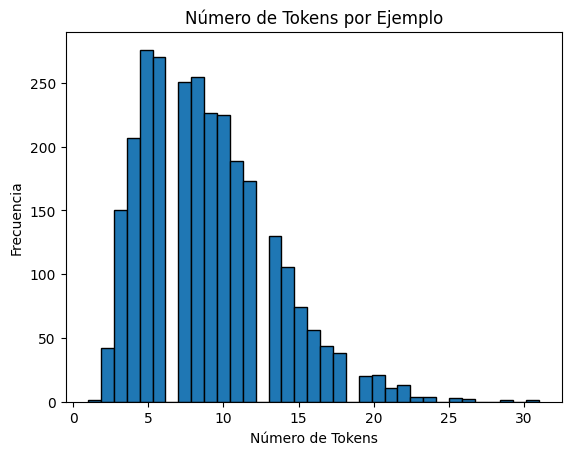

Total de ejemplos: 2793
Percentil 25: 6.0
Percentil 50 (Mediana): 8.0
Percentile 75: 12.0
Max: 31


In [ ]:
# @markdown ❗
# Generación de histograma del número de tokens por ejemplos
import matplotlib.pyplot as plt
import numpy as np

# Cálculo de número de tokens por ejemplos
def count_tokens_fn(batch):
    tokenized_batch = tokenizer(batch['samples'])
    tokenized_batch['count'] = [len(tks) for tks in tokenized_batch['input_ids']]
    return tokenized_batch

result = gpt2_ds.map(
    function=count_tokens_fn,
    batched=True
)

num_of_tokens_list = result['train']['count'] + result['test']['count']

# Generación de histograma
plt.hist(num_of_tokens_list, bins=35, edgecolor='k')
plt.xlabel('Número de Tokens')
plt.ylabel('Frecuencia')
plt.title('Número de Tokens por Ejemplo')
plt.show()

# Cálculo de percentiles (e.g., 25th, 50th, and 75th percentiles)
percentiles = np.percentile(num_of_tokens_list, [25, 50, 75])

print(f"Total de ejemplos: {len(num_of_tokens_list)}")
print(f"Percentil 25: {percentiles[0]}")
print(f"Percentil 50 (Mediana): {percentiles[1]}")
print(f"Percentile 75: {percentiles[2]}")
print(f"Max: {np.max(num_of_tokens_list)}")

- Al igual que antes, en `MAX_TOKEN_LENGTH` podrán elegir el largo máximo que el modelo utilizará para codificar cada ejemplo/muestra de entrada. Truncando aquellos que superen este límite, y realizando un padding para homogeneizar la longitud de las muestras.

In [ ]:
# @markdown ❗
# Tokenicación de conjunto de datos completo

# Número máximo de tokens a utilizar
MAX_TOKEN_LENGTH = 32 # @param {type:"slider", min:8, max:128, step:8}

def tokenize_data_fn(batch):
    tokenized_sample = tokenizer(
        batch['samples'],
        max_length=MAX_TOKEN_LENGTH,
        truncation=True,
        padding='max_length',
        return_tensors='pt',
    )

    tokenized_sample["labels"] = tokenized_sample['input_ids'].clone()
    return tokenized_sample

tokenized_gpt2_ds = gpt2_ds.map(
    function=tokenize_data_fn,
    batched=True,
    remove_columns=["samples"]
)

print(tokenized_gpt2_ds)

Map:   0%|          | 0/2235 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 2235
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 558
    })
})


### Decodificando

- Podemos ver que los textos pasan a estar agrupados en bloques de `MAX_TOKEN_LENGTH` tokens.
- Además, vemos que el texto fue reemplazado por números (índices en el vocabulario).
- Por último, si decodificamos estos números, obtenemos el texto original.

In [ ]:
# @markdown 🔎
print(len(tokenized_gpt2_ds['train'][0]['input_ids']))
print(tokenized_gpt2_ds['train'][0]['input_ids'][:10])

32
[57, 1250, 432, 21, 576, 3505, 315, 299, 366, 4577]


In [ ]:
# @markdown 🔎
print(tokenizer.decode(tokenized_gpt2_ds['train'][0]['input_ids']))

Peppa, ¿seguro que no quieres quitarte los zapatos?<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>


### Entrenamiento

- Una vez definido el conjunto de datos, pasamos a la parte más intensa computacionalmente, el entrenamiento.
- Podemos decidir guardar el modelo localmente o hacer un backup de cada época del modelo en Hugging Face.
- Definimos las propiedades del entrenamiento mediante [`TrainingArguments`](https://huggingface.co/docs/transformers/v4.28.1/en/main_classes/trainer#transformers.TrainingArguments).
- Definimos el entrenamiento del modelo mediante [`Trainer`](https://huggingface.co/docs/transformers/v4.28.1/en/main_classes/trainer#transformers.Trainer).
    - El entrenamiento tardará desde unos segundos hasta varias horas dependiendo el poder de cómputo, parámetros elegidos y tamaño del dataset.

In [ ]:
# @markdown ❗⏳
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling

# Configuración de hiperparámetros
LEARNING_RATE = 2e-5 # @param {type:"number"}
BATCH_SIZE = 8 # @param {type:"slider", min:8, max:64, step:8}
EPOCHS = 5 # @param {type:"slider", min:3, max:15, step:1}
model_name = dataset_name.replace(" ", "-")[:-5]

# Configuración de entrenamiento
training_args = TrainingArguments(
    model_name,
    evaluation_strategy='epoch',
    num_train_epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    weight_decay=0.01,
    logging_steps=5
)

# Instanciación de modelo y clase Trainer
model = AutoModelForCausalLM.from_pretrained(BASE_MODEL)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_gpt2_ds['train'],
    eval_dataset=tokenized_gpt2_ds['test']
)

# Inicio de entrenamiento
trainer.args._n_gpu = 1
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss
1,0.836400,0.823168
2,0.772000,0.786529
3,0.611800,0.775354
4,0.612300,0.770544
5,0.464500,0.770929


TrainOutput(global_step=1400, training_loss=0.6844832113810948, metrics={'train_runtime': 163.2572, 'train_samples_per_second': 68.45, 'train_steps_per_second': 8.575, 'total_flos': 182496153600000.0, 'train_loss': 0.6844832113810948, 'epoch': 5.0})

- Ahora será necesario ingresar a la plataforma HuggingFace 🤗 para subir nuestro modelo. Luego podrán utilizarlo tanto en este taller con la librería `transformers` como compartir con sus amigos en la versión web.

In [ ]:
# @markdown ❗

# Logeo a plataforma mediante token de acceso
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# @markdown ❗

# Esto envía el modelo entrenado al repositorio de modelos de Hugging Face.
trainer.push_to_hub()
tokenizer.push_to_hub(model_name)

events.out.tfevents.1727318507.82aecff6148a.211.0:   0%|          | 0.00/65.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jbarsce/Peppa-Pig/commit/7c8427113fe05138b068fafa1a108b7f1013c6d5', commit_message='Upload tokenizer', commit_description='', oid='7c8427113fe05138b068fafa1a108b7f1013c6d5', pr_url=None, pr_revision=None, pr_num=None)

### Probando el Nuevo Modelo

- Ahora que tenemos el modelo entrenado, la pregunta es, ¿Cómo se comportará?
- Para ello volvemos a hacer la prueba anterior, quizás esta vez con mejores resultados.
- En `MODEL` deberán pegar el link al modelo que acaban de subir. Tendrá un formato del estilo `username/modelName`.

In [ ]:
# @markdown ❗
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

MODEL = "jbarsce/Peppa-Pig" # @param {type:"string"}
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForCausalLM.from_pretrained(MODEL)

tokenizer_config.json:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/840k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/498k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/771 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

- En esta celda podrán probar su modelo. Les incentivamos a ser creativos con las frases que elijan para completarla y comparar los resultados del modelo base con el modelo adaptado.

In [ ]:
# @markdown ❗

ejemplo = "Ayer, al despertarme" # @param {type:"string"}
input_ids = tokenizer.encode(ejemplo, return_tensors='pt')
sampling_output = model.generate(input_ids, do_sample=True, max_length=50, top_k=50, top_p=0.95, pad_token_id=tokenizer.eos_token_id)
output = tokenizer.decode(sampling_output[0], skip_special_tokens=True)

print(output)

Ayer, al despertarme a las diez y después de desayunar, papá Pig y Papá Pig han encontrado esta carta en la cómoda.
